In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df_train = pd.read_csv(r"C:\Users\dhanu\OneDrive\Desktop\cdc project\train_1_tab.csv")
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [3]:
# EDA to explore the data

# check for null values
df_train.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# all the columns are filled without any null values

# check for duplicates/uniques
df_train.shape

(16209, 21)

In [5]:
df_train["id"].nunique()

16110

In [6]:
# total number of rows in the dataset = 16209
# but total unique ids = 16110
# means same property has been sold and bought multiple times
# since the images i have downloaded do not contain these duplicates, i will remove all the duplicates and keep only the recent purchase data

# before that, let's check the data types of the dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [10]:
# date is object dtype and id is numeric, need to convert date column to datetime dtype
# and id to string format for easier access and operations

df_train["date"] = pd.to_datetime(df_train["date"])

df_train["id"] = df_train["id"].astype(str)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             16209 non-null  object        
 1   date           16209 non-null  datetime64[ns]
 2   price          16209 non-null  int64         
 3   bedrooms       16209 non-null  int64         
 4   bathrooms      16209 non-null  float64       
 5   sqft_living    16209 non-null  int64         
 6   sqft_lot       16209 non-null  int64         
 7   floors         16209 non-null  float64       
 8   waterfront     16209 non-null  int64         
 9   view           16209 non-null  int64         
 10  condition      16209 non-null  int64         
 11  grade          16209 non-null  int64         
 12  sqft_above     16209 non-null  int64         
 13  sqft_basement  16209 non-null  int64         
 14  yr_built       16209 non-null  int64         
 15  yr_renovated   1620

In [11]:
# id column converted to string type
# date column converted to datetime format

# now trying to remove the duplicates in the dataset and keeping only the recent purchase data (for the same property bought multiple times)

df_train = df_train.sort_values("date")
df_train = df_train.groupby("id", as_index = False).last()

df_train.shape

(16110, 21)

In [12]:
# all the duplicates have been removed and only the recent data has been kept

In [33]:
df_train.to_csv(r"C:\Users\dhanu\OneDrive\Desktop\cdc project\train_data_updated.csv", index = False)

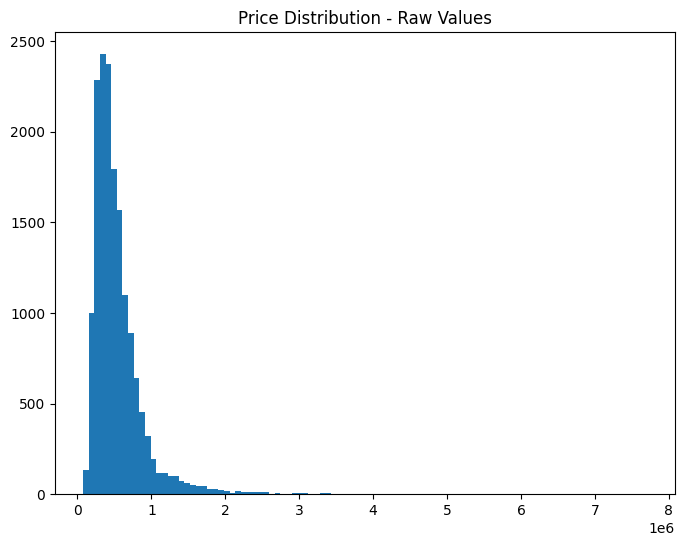

In [ ]:
plt.figure(figsize = (8,6))
plt.hist( df_train["price"], bins = 100)
plt.title("Price Distribution - Raw Values")
plt.show()

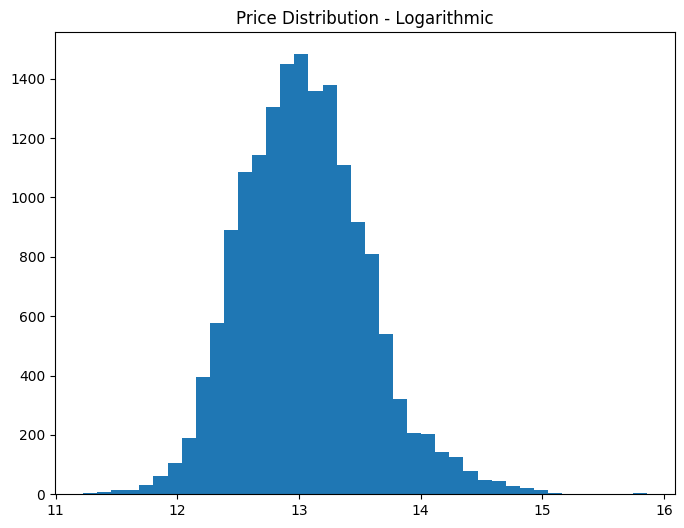

In [29]:
# as we can see from the graph, the price values appear to be right skewed
# let's plot using the log values of the prices, to see what trend it consists of

plt.figure(figsize = (8,6))
plt.hist(np.log1p(df_train["price"]), bins = 40)
plt.title("Price Distribution - Logarithmic")
plt.show()

<Axes: >

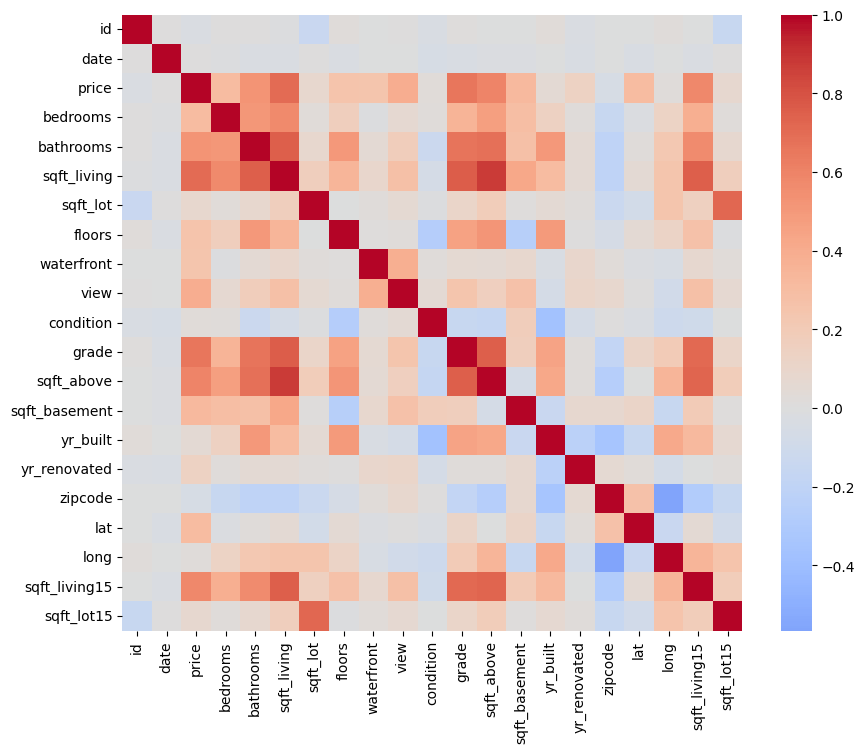

In [30]:
# the price values are appearing symmetric now

# feature correlation to see what affects the price the most

plt.figure(figsize = (10,8))
sns.heatmap(df_train.corr(), cmap = 'coolwarm', center = 0)


In [36]:
# ignore the id and the date since they don't show any correlation
# from the heatmap, it can be observed that the price column is mainly dependent on the features :
# sqft_living, grade, sqft_above, sqft_living15, and some slight correlation can be seen from bathrooms, sqft_basement, view


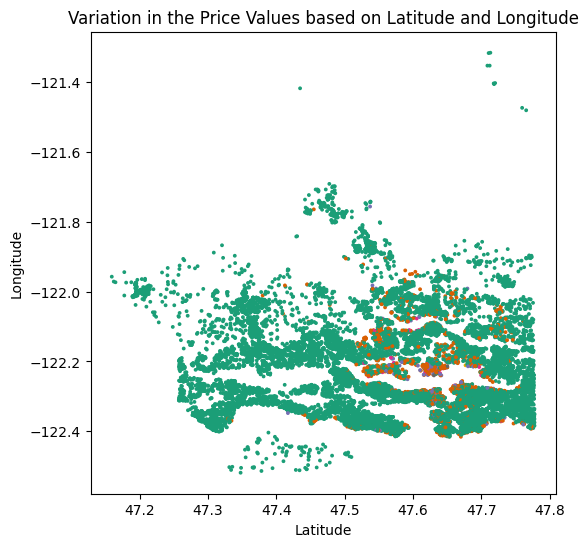

In [56]:
# lat column is giving some correlation with price, so we need to check the correlation between lat and long specifically

plt.figure(figsize = (6,6))
plt.scatter(df_train["lat"], df_train["long"], c = df_train["price"], cmap = "Dark2", s = 3)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Variation in the Price Values based on Latitude and Longitude")
plt.show()

<Axes: xlabel='waterfront', ylabel='price'>

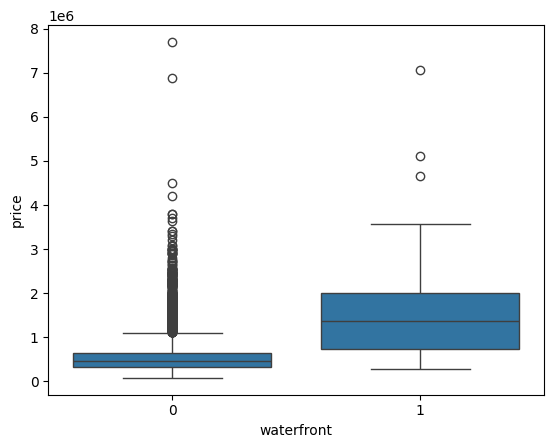

In [ ]:
# there appears to be a certain region (orange) where the price ranges are appearing to be higher than the majority
# the cavities observed in this plot, either present the presence of water bodies or rich greenery, which drastically increases the prices of the houses

# we observed a slight correlation based on the presence of waterfront, lets see how much variation we can obeserve for the prices based on waterfront

sns.boxplot(x = "waterfront", y = "price", data = df_train)


In [77]:
df_updated = pd.read_csv(r"C:\Users\dhanu\OneDrive\Desktop\cdc project\train_data_updated.csv")
df_updated.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,2014-09-16,280000,6,3.00,2400,9373,2.0,0,0,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
1,1001200050,2014-09-23,259000,4,1.50,1260,7248,1.5,0,0,...,7,1260,0,1955,0,98188,47.4330,-122.292,1300,7732
2,1003000175,2014-12-22,221000,3,1.00,980,7606,1.0,0,0,...,7,980,0,1954,0,98188,47.4356,-122.290,980,8125
3,100300280,2014-10-20,355000,3,2.25,1430,4777,2.0,0,0,...,7,1430,0,2010,0,98059,47.4867,-122.152,1639,3854
4,100300530,2014-09-25,330000,3,2.50,1520,3003,2.0,0,0,...,7,1520,0,2009,0,98059,47.4876,-122.153,1820,3030


In [78]:
# from the box plot, we can see that the price range is on the higher side when the waterfront is present, compared when it is not present
# though there are many outliers, even when the waterfront is not present, some houses still have higher prices, potentially due to other factors

# let's get some images and see what is the major difference between the high priced ones and the low priced ones



sample_df = df_updated.sort_values("price")
sample_low = sample_df.iloc[0:9, 0]
sample_high = sample_df.iloc[-9:, 0]


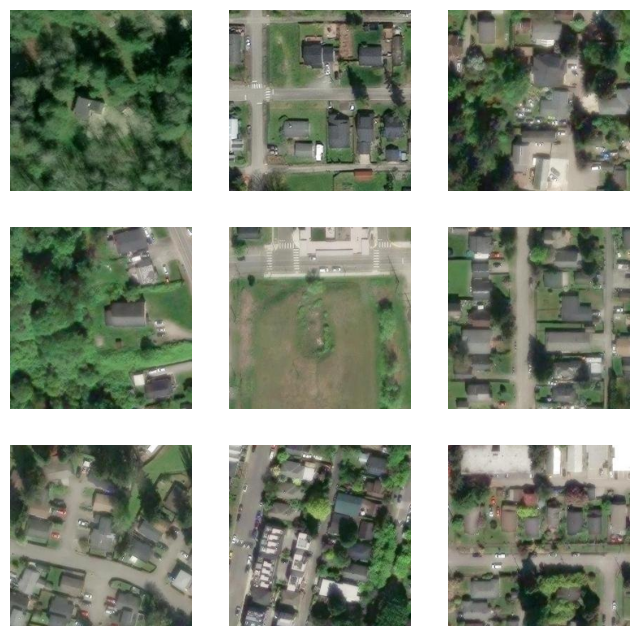

In [80]:
# now that we have collected the ids for the lowest and highest price houses, let's see the variation in the house images downloaded based on the ids

from PIL import Image
fig, axes = plt.subplots(3,3, figsize = (8,8))

for ax, p_id in zip(axes.flatten(), sample_low):
    img_temp = Image.open(f"C:/Users/dhanu/OneDrive/Desktop/cdc project/images/train/{p_id}.png")
    ax.imshow(img_temp)
    ax.axis("off")
    


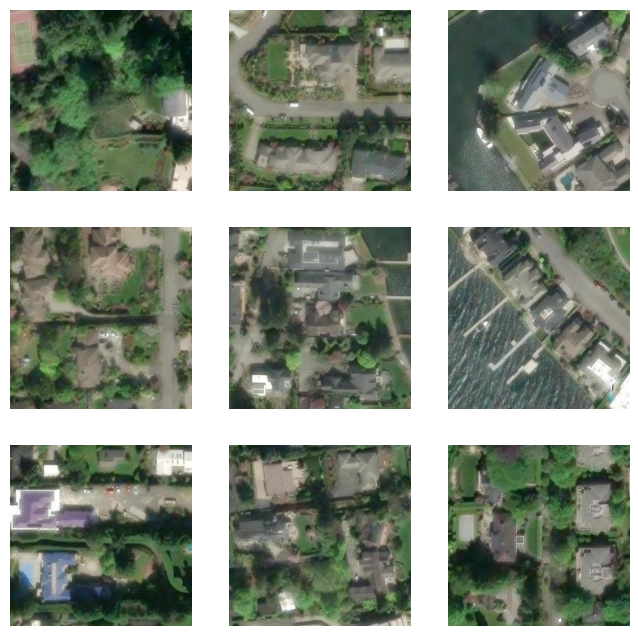

In [81]:
fig, axes = plt.subplots(3,3, figsize = (8,8))

for ax, p_id in zip(axes.flatten(), sample_high):
    img_temp = Image.open(f"C:/Users/dhanu/OneDrive/Desktop/cdc project/images/train/{p_id}.png")
    ax.imshow(img_temp)
    ax.axis("off")

In [90]:
# as we compare the both sets of pictures, the first set of images (which are of low prices) appear to have less number of greenery and waterfront bodies
# but in the second sets of pictures (which are of the higher prices), have waterfront bodies and abundant greenery
# these elements will play an important role during visual data training

<Axes: xlabel='sqft_living', ylabel='sqft_living15'>

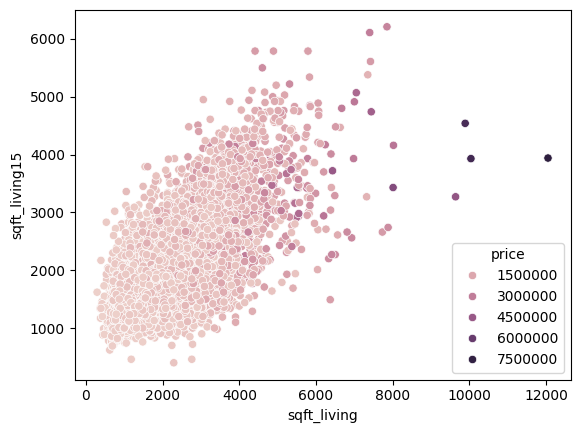

In [ ]:
# from the correlation plot, we can observe that two features : sqft_livivng and sqft_living15 do have a significant impact on the price column
# so lets check the relation of house density per given house and how it affects the final price of the house

sns.scatterplot(x = "sqft_living", y = "sqft_living15", hue = "price", data = df_updated)

<Axes: xlabel='sqft_living', ylabel='sqft_lot15'>

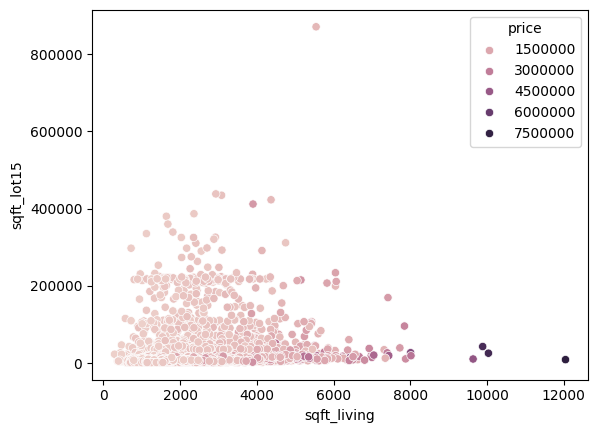

In [86]:
sns.scatterplot(x = "sqft_living", y = "sqft_lot15", hue = "price", data = df_updated)

<Axes: xlabel='relative_size', ylabel='price'>

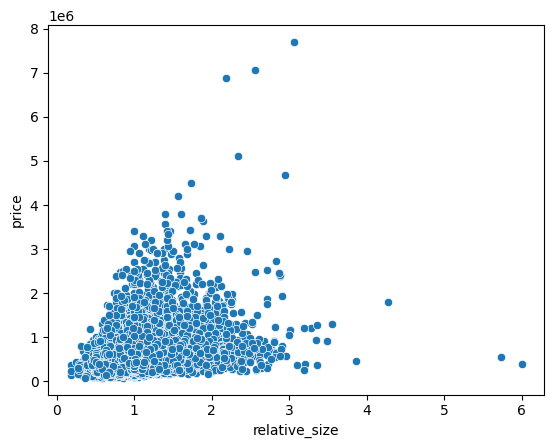

In [89]:
# from the first plot, we can see that for smaller area of the houses (living space) with surrounding houses of lower area tend to be priced at a lower value
# but houses with larger areas surrounded by also larger area houses, appear to be priced at a high value

# the second plot shows significance of living space area versus total lot area, larger lot area houses still appear to have a lower price, but the houses with larger living area are priced at higher price
# let's cross check with a new feature :  relative house area

df_updated["relative_size"] = df_updated["sqft_living"] / df_updated["sqft_living15"]
sns.scatterplot(x = "relative_size", y = 'price', data = df_updated)

In [ ]:
# from this plot, we can interpret that the area of the houses surrounded by is also playing a factor in determining the price
# most houses with lower relative size (meaning houses surrounded by smaller area houses) are fetching a lower price, 
# while houses surrounded by larger houses are fetching a higher price